# PREDICTING CUSTOMER CHURN FOR SYRIATEL

Name: Amos Kipngetich Rotich

Student Pace: Part Time

Scheduled Project Review Date/Time: September 1, 2024

Instructor Name: Winnie Anyoso


## 1. Introduction

### Background:

Customer churn/turnover is a significant concern for telecommunications companies like SyriaTel. Churn occurs when customers discontinue their service, leading to revenue loss and increased costs for acquiring new customers. Understanding and predicting churn enables companies like SyriaTel to take proactive measures to retain customers at risk of leaving, thereby improving customer satisfaction and reducing financial losses.

### Objective:

The primary objective of this project is to develop a predictive model that identifies SyriaTel customers likely to end their relationship with the company. By accurately predicting the turnover, SyriaTel can focus its retention efforts on at-risk customers, ultimately reducing churn rates and enhancing the company's profitability.

### Dataset Overview:

The dataset used in this project contains records of 3,333 SyriaTel customers. The dataset includes various attributes related to customer demographics, account details, service usage, and customer service interactions. The target variable is churn, a binary indicator of whether a customer has stopped using SyriaTel’s services.

### Business Problem:

For SyriaTel, retaining customers is crucial to maintaining a stable revenue stream. By analyzing data on customer behavior and service usage, the company can identify patterns that suggest a higher likelihood of turnover. The predictive model developed in this project will assist SyriaTel in implementing targeted retention strategies, such as personalized offers or improved customer support, to reduce churn.

## 2. Data Processing

We start by handling any necessary preprocessing steps, including converting categorical variables, handling missing values (if any), and scaling numerical features.

Let's start with the preprocessing:


### A.  Data Understanding

#### 1. Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

#### 2. Import Dataset

In [2]:
data = 'bigml_59c28831336c6604c800002a.csv'
df = pd.read_csv(data)

#### 3. Data Overview

In [3]:
df.shape

(3333, 21)

The dataset consists of 3,333 customer records, each containing 21 attributes.

In [4]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

The dataset includes features such as:

1. State: The U.S. state in which the customer resides.
2. Account length: The duration of the customer's account.
3. Area code: The area code of the customer's phone number.
4. Phone number: The customer's phone number.
5. International plan: Whether the customer has an international calling plan.
6. Voice mail plan: Whether the customer has a voice mail plan.
7. Churn: A binary column indicating if the customer has churned (True) or not (False).

### B. Data Preprocessing
#### 1. Converting Categorical Variables:
We'll convert categorical variables such as state, international plan, and voice mail plan into numerical values using one-hot encoding.

#### 2. Scaling Numerical Features:
For models sensitive to feature scales, such as logistic regression, we will standardize the numerical features.

In [6]:
# Separate features and target variable
X = df.drop(columns=['churn', 'phone number'])
y = df['churn']

# Define the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['account length', 'number vmail messages', 
                                   'total day minutes', 'total day calls', 'total day charge',
                                   'total eve minutes', 'total eve calls', 'total eve charge',
                                   'total night minutes', 'total night calls', 'total night charge',
                                   'total intl minutes', 'total intl calls', 'total intl charge',
                                   'customer service calls']),
        ('cat', OneHotEncoder(), ['state', 'area code', 'international plan', 'voice mail plan'])
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

### C. Exploratory Data Analysis

We will visualize the dataset to understand the relationships between features and the target variable (churn). This step helps in feature selection and in gaining insights that might influence business recommendations.

#### Key Analyses:
i. Distribution of numerical features like total day minutes, customer service calls, etc.

ii. Churn rates across different states and plans.

iii. Correlation matrix to identify highly correlated features.

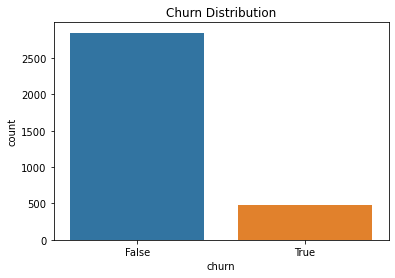

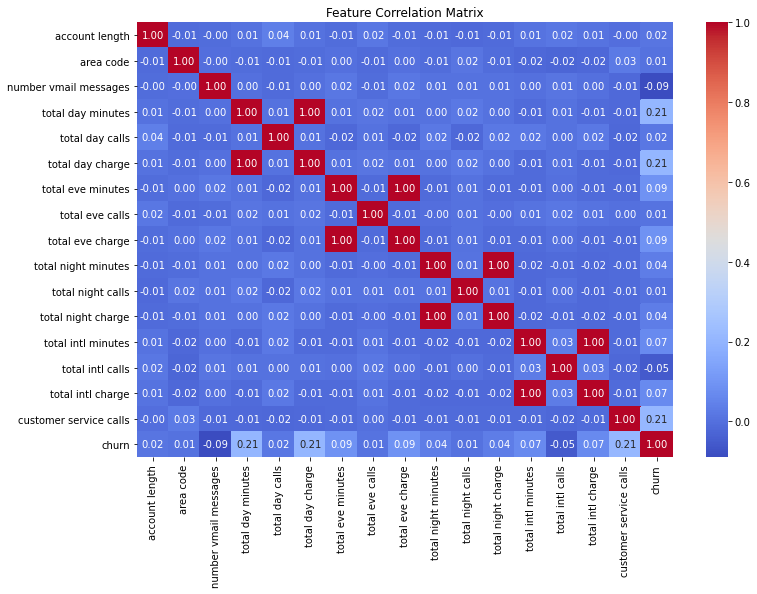

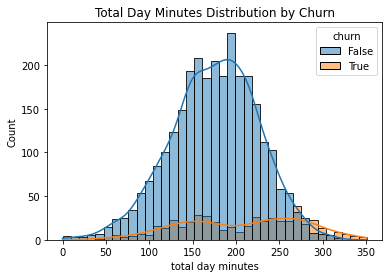

In [9]:
# Visualize churn rate
sns.countplot(x='churn', data=df)
plt.title('Churn Distribution')
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

# Distribution of a key feature
sns.histplot(data=df, x='total day minutes', kde=True, hue='churn')
plt.title('Total Day Minutes Distribution by Churn')
plt.show()

### Interpreting the Plots

##### Churn Distribution Bar Plot

Majority of SyriaTel customers did not churn, as indicated by the tall blue bars(False) while only a small proportion of its customers churned, represented by the short orange bars(True).

This indicates an imbalanced dataset which could greatly impact model performance.

##### Correlation Heatmap

Most of the elements show weak correlations (close to 0). This indicates that most features are not strongly correlated with each other.

The weak correlation indicates that each feature contributes independently to predicting SyriaTel's customer turnover. This therefore favours Decision Tree Model which handles uncorrelated features very well.

##### Distribution Plot of 'Total Day Minutes' by Churn

The distribution of non-churned customers is fairly normal, dorminates the plot and peaks around the middle while churned customers' distribution is spread out with a lower peak. 

The plot suggests that higher usage might be associated with an increased likelihood of churn.

### 3. Model Building and Selection

We will train Logistic Regression and Decision Tree models and compare their performance to identify the best model for this task.

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score

In [12]:
# Initialize models
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Train the models
logistic_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)

# Predict using Logistic Regression
logistic_pred = logistic_model.predict(X_test)
logistic_prob = logistic_model.predict_proba(X_test)[:, 1]

# Predict using Decision Tree
decision_tree_pred = decision_tree_model.predict(X_test)
decision_tree_prob = decision_tree_model.predict_proba(X_test)[:, 1]

# Evaluate Logistic Regression
logistic_report = classification_report(y_test, logistic_pred)
logistic_auc = roc_auc_score(y_test, logistic_prob)

# Evaluate Decision Tree
decision_tree_report = classification_report(y_test, decision_tree_pred)
decision_tree_auc = roc_auc_score(y_test, decision_tree_prob)

print("Logistic Regression Report:")
print(logistic_report)
print(f"Logistic Regression AUC-ROC Score: {logistic_auc}\n")

print("Decision Tree Report:")
print(decision_tree_report)
print(f"Decision Tree AUC-ROC Score: {decision_tree_auc}\n")

Logistic Regression Report:
              precision    recall  f1-score   support

       False       0.87      0.97      0.92       566
        True       0.55      0.18      0.27       101

    accuracy                           0.85       667
   macro avg       0.71      0.58      0.59       667
weighted avg       0.82      0.85      0.82       667

Logistic Regression AUC-ROC Score: 0.8255956337683239

Decision Tree Report:
              precision    recall  f1-score   support

       False       0.95      0.96      0.96       566
        True       0.77      0.74      0.76       101

    accuracy                           0.93       667
   macro avg       0.86      0.85      0.86       667
weighted avg       0.93      0.93      0.93       667

Decision Tree AUC-ROC Score: 0.8518524997376062



The Logistic Regression Model seems to be struggling with the minority class which is the churned customers.

Precision - 0.55
Recall    - 0.18
f1score   - 0.27

The recall of 0.18 indicates that our model misses a significant number of actual churn cases. This is because the model is biased towards the majority class.

The Decision Tree Model performs better than the Logistic Regression Model.

Precision - 0.77
Recall    - 0.74
f1score   - 0.76

The recall of 0.74 indicates that the model can identifying churned customers, which suggests that it handles the class imbalance better than Logistic Regression. 

We therefore pick to build on the Decision Tree Model 

#### Decision Tree Model Tuning

Fine-tune the Decision Tree Model using cross-validation and hyperparameter tuning.

##### Cross Validation

In [15]:
# Instantiate the model
dt = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data here
dt.fit(X_train, y_train)

# Testing out the model's r2 score on the training data overall
dt_train_score = dt.score(X_train, y_train)
dt_train_score

1.0

In [18]:
# Assign the cross validated score to dt_cv

dt_cv = cross_val_score(dt, X_train, y_train, cv=5)

dt_cv

array([0.34849673, 0.10284216, 0.325237  , 0.12936391, 0.45926331])

##### Hyperparameter Tuning

- Random_state = 42
- Max_depth = 10

In [35]:
# Creating a second decision tree model
dt_tuned = DecisionTreeRegressor(random_state=42, max_depth=10)

# Fit the new model on the training data
dt_tuned.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=10, random_state=42)

In [36]:
# Testing out the model's r2 score on the training data overall
dt_tuned_train_score = dt_tuned.score(X_train, y_train)
dt_tuned_train_score

0.8773588960811947

In [37]:
# Checking the Cross-validated coefficient of determination (r2 score) of the predictions of `dt_tuned` on the training data
dt_tuned_cv = cross_val_score(dt_tuned, X_train, y_train, cv=5)

dt_tuned_cv

array([0.50972452, 0.34176153, 0.41964667, 0.30969884, 0.55667129])

In [43]:
# Extract feature importance from the best Decision Tree model
feature_importance = dt_tuned.feature_importances_

# Create a DataFrame to hold the features and their importance
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualize the feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance from Decision Tree')
plt.show()

AttributeError: columns not found

In [38]:
from sklearn.tree import plot_tree

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(best_dt, feature_names=X_train.columns, class_names=['Not Churn', 'Churn'], filled=True, rounded=True)
plt.show()

NameError: name 'best_dt' is not defined

<Figure size 1440x720 with 0 Axes>